In [134]:
# load plotting library and src files
using PyPlot
include("./src/calcpml_2d.jl");
include("./src/yeeder.jl");
include("./src/fdfd.jl");
include("./src/calc_gradient.jl");

In [205]:
L = 1;
c0 = 1;
dl = 0.01;
beta = 1;
lam = 2*L*beta;
spc = L/4.0;
src = 0.5*L;
pml = 20*dl;
Pol = "Hz";
BC = [-1,-1];
NPML = [0 0 20 20];
RES = [dl/2 dl/2];

X = lam;
Y = 2*(3*L/2+src+spc+pml);

Nx = Int(X/dl);
Ny = Int(Y/dl);

Ne = 200;
eps_range = linspace(1,20,Ne);
de = 0.001
AVM_s = zeros(Complex64,Ne,1);
D_s = zeros(Ne,1);
G_list = zeros(Ne,1);
phi_list = zeros(Ne,1);

b_init = zeros(Complex64,Nx,Ny);
b_init[:,Int(ceil(Ny/2-spc/dl-L/dl-src/dl))] = 1*im;
b_init[:,Int(ceil(Ny/2+spc/dl+L/dl+src/dl))] = -1*im;

MUR2 = ones(Complex64,Nx*2,Ny*2);
ER2 = ones(Complex64,Nx*2,Ny*2);

Q = ones(Nx,Ny);
Q[:,40:end-40] = 0;


Ex0 = zeros(Complex64,Nx,Ny);
Ey0 = zeros(Complex64,Nx,Ny);
Hz0 = zeros(Complex64,Nx,Ny);

eps_struct = zeros(Complex64,Nx,Ny);
delta_device = zeros(Complex64,Nx,Ny);
g = 1;
G = 0;
phi = 0;
b=zeros(Complex64,Nx*Ny,1);

In [206]:
for i in (1:Ne)
    eps = eps_range[i];
    #println(i/Ne*100.0,"eps is",eps);

    #original calculation    
    ER2[Int(Nx-L/dl-1):Int(Nx+L/dl+1),Int(Ny-2*spc/dl-2*L/dl-1):Int(Ny-2*spc/dl+1)] = eps/2;
    ER2[Int(Nx-L/dl-1):Int(Nx+L/dl+1),Int(Ny+2*spc/dl-1):Int(Ny+2*spc/dl+2*L/dl+1)] = eps/2;    
    ER2[Int(Nx-L/dl):Int(Nx+L/dl),Int(Ny-2*spc/dl-2*L/dl):Int(Ny-2*spc/dl)] = eps;
    ER2[Int(Nx-L/dl):Int(Nx+L/dl),Int(Ny+2*spc/dl):Int(Ny+2*spc/dl+2*L/dl)] = eps;
    
    (Ex0,Ey0,Ez0,Hx0,Hy0,Hz0,eps_struct,DEX,DEY) = fdfd(ER2,MUR2,RES,NPML,BC,lam,Pol,b_init);
    (G,phi) = calc_gradient(Ex0,lam,dl,beta);
    G_list[i] = G;
    println(G);
    phi_list[i] = phi;
end

0.012451486717713338
0.0015847332167027877
0.003870810692980593
0.00837172911711418
0.033218349474967525
0.005499760706918595
0.0010154607135141693
0.003931695141484915
0.006148187445458575
0.007987030260664336
0.009542345257955017
0.010837895478406792
0.011886589012238364
0.012707945151702269
0.01332991120782024
0.0137851051158546
0.014106399125001135
0.014323796473964923
0.014462926328279401
0.014544742828287976
0.014585910284691283
0.014599481193962373
0.014595626403111763
0.014582305310089215
0.014565833302227058
0.014551343808316908
0.014543159208286822
0.014545089596805475
0.014560680058839958
0.014593423344154562
0.01464695661067567
0.014725252354940502
0.014832822331973161
0.014974941174679027
0.015157895365161479
0.015389257221847958
0.015678116498838494
0.016035141048178665
0.016471984396616273
0.016998848591476403
0.017616893939325917
0.018296737240916044
0.01892214751748679
0.019164814744043555
0.01833131164077416
0.01562851543871736
0.011275695779772816
0.00665409420275738

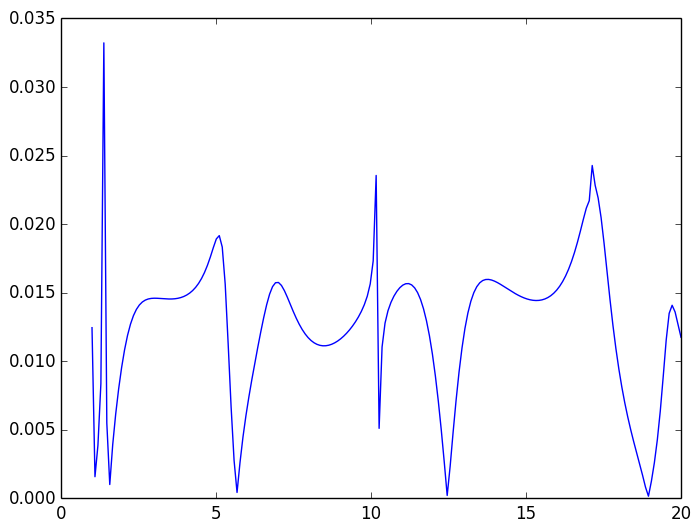

1-element Array{Any,1}:
 PyObject <matplotlib.lines.Line2D object at 0x32ecfa950>

11753806478281394


In [207]:
#plot(eps_range,-105*real(AVM_s));
#plot(eps_range,D_s);
plot(eps_range,G_list)

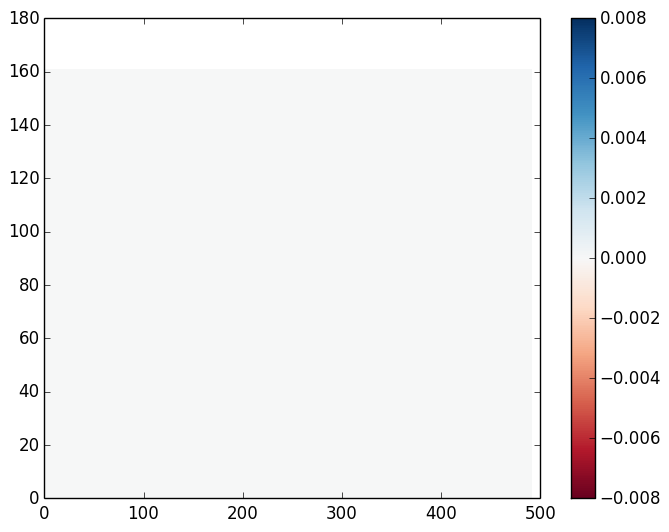

PyObject <matplotlib.colorbar.Colorbar instance at 0x321101a28>

In [159]:
#pcolormesh(real(Ex_aj[:,20:end-20]).*real(Ex0[:,20:end-20]).*real(eps[:,20:end-20]),cmap="RdBu")
pcolormesh(real(Ex_aj[20:end-20,20:end-20]),cmap="RdBu",vmin=-0.008,vmax=0.008)
colorbar()

this is G0.

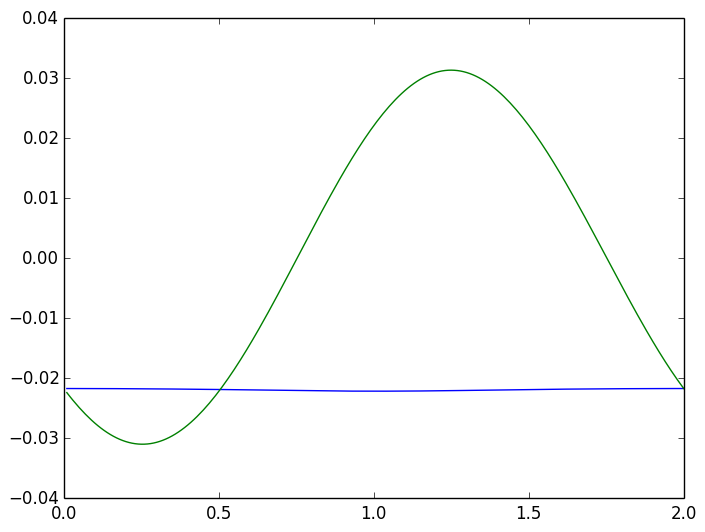

00014912883813266922


In [191]:
xs = dl*(1:Nx);
(a,b) = size(Ex0);
#plot(xs,imag(Ex0[:,Int(b/2)]))
phi = phi_list[1];
plot(xs,real(Ex0[:,Int(b/2)]))
plot(xs,real(Ex0[:,Int(b/2)].*exp(im*(2*pi/lam/beta*xs))))
sum(real(Ex0[:,Int(b/2)].*exp(im*(2*pi/lam/beta*xs + phi*ones(Nx,1)))))
(G,phi) = calc_gradient(Ex0,lam,dl,beta);
println("this is G", G)

In [169]:
G_list

2x1 Array{Float64,2}:
 0.0124515 
 4.74445e-6

In [99]:
size(1:20)


(20,)

In [100]:
AVM_s

2x1 Array{Complex{Float32},2}:
 0.0+0.0im
 0.0+0.0im

In [175]:
G_list

2x1 Array{Float64,2}:
 0.0124515 
 4.74445e-6

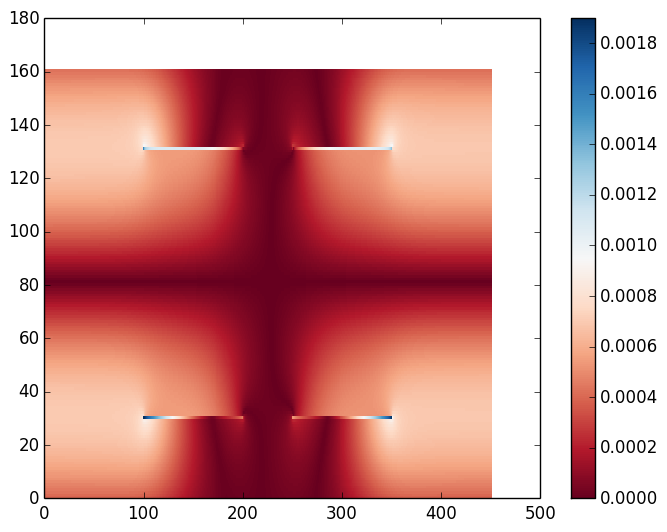

PyObject <matplotlib.colorbar.Colorbar instance at 0x32ef6d998>

In [172]:
pcolormesh(abs(Ey0[20:end-20,20:end-20]),cmap="RdBu")
colorbar()

In [10]:
Ny

530